In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Lendo arquivos .pkl
list_M = [4, 16, 64]            # Ordem da modulação
list_LOSPR  = [value for value in range(6,20,2)] # LOSPR do sistema

list_SNR_BR = [ [[],[],[]], [[],[],[]]]
list_BER_BR = [ [[],[],[]], [[],[],[]]]
list_OSNR_BR = [[],[],[]]

list_SNR_SER = [ [[],[],[]], [[],[],[]]]
list_BER_SER = [ [[],[],[]], [[],[],[]]]
list_OSNR_SER = [[],[],[]]

In [14]:
# Importando .pkl do receptor balanceado
idx_Recpt = 'BR'
for idx, idx_M in enumerate(list_M):
    for idx_LOSPR in list_LOSPR:
        nameFile = f'.\\arquivosPickle\\{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
        with open(nameFile, 'rb') as arquivo:
            data = pickle.load(arquivo)
            
            list_OSNR_BR[idx].append(data['OSNR'])
            
            list_SNR_BR[0][idx].append(data['SNR_mode0'])
            list_BER_BR[0][idx].append(data['BER_mode0'])
            
            list_SNR_BR[1][idx].append(data['SNR_mode1'])
            list_BER_BR[1][idx].append(data['BER_mode1'])

In [15]:
# Importando .pkl do receptor single ended
list_LOSPR_new = [ [value for value in range(6,20,2)], [value for value in range(8,20,2)], [value for value in range(14,20,2)] ]
idx_Recpt = 'SER'
for idx, idx_M in enumerate(list_M):
    for idx_LOSPR in list_LOSPR_new[idx]:
        nameFile = f'.\\arquivosPickle\\{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
        with open(nameFile, 'rb') as arquivo:
            data = pickle.load(arquivo)
            
            list_OSNR_SER[idx].append(data['OSNR'])
            
            list_SNR_SER[0][idx].append(data['SNR_mode0'])
            list_BER_SER[0][idx].append(data['BER_mode0'])
            
            list_SNR_SER[1][idx].append(data['SNR_mode1'])
            list_BER_SER[1][idx].append(data['BER_mode1'])

In [16]:
# Completando com NaN
while len(list_OSNR_SER[0]) < len(list_OSNR_BR[0]):
    list_OSNR_SER[0].insert(0, np.nan)

while len(list_OSNR_SER[1]) < len(list_OSNR_BR[1]):
    list_OSNR_SER[1].insert(0, np.nan)
    
while len(list_OSNR_SER[2]) < len(list_OSNR_BR[2]):
    list_OSNR_SER[2].insert(0, np.nan)
    
while len(list_BER_SER[0][0]) < len(list_BER_BR[0][0]):
    list_BER_SER[0][0].insert(0, np.nan)

while len(list_BER_SER[0][1]) < len(list_BER_BR[0][1]):
    list_BER_SER[0][1].insert(0, np.nan)
    
while len(list_BER_SER[0][2]) < len(list_BER_BR[0][2]):
    list_BER_SER[0][2].insert(0, np.nan)
    
while len(list_BER_SER[1][0]) < len(list_BER_BR[1][0]):
    list_BER_SER[1][0].insert(0, np.nan)

while len(list_BER_SER[1][1]) < len(list_BER_BR[1][1]):
    list_BER_SER[1][1].insert(0, np.nan)
    
while len(list_BER_SER[1][2]) < len(list_BER_BR[1][2]):
    list_BER_SER[1][2].insert(0, np.nan)

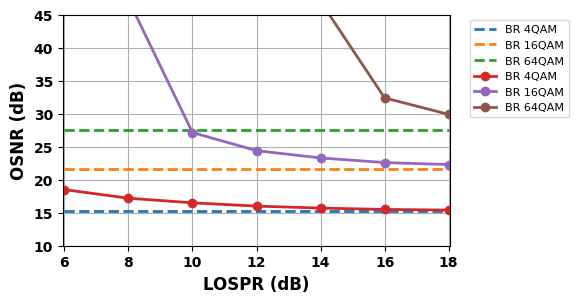

In [17]:
plt.figure(figsize=(5,3))
plt.plot(list_LOSPR, list_OSNR_BR[0], '--', linewidth=2.0, label= 'BR 4QAM')
plt.plot(list_LOSPR, list_OSNR_BR[1], '--', linewidth=2.0, label= 'BR 16QAM')
plt.plot(list_LOSPR, list_OSNR_BR[2], '--', linewidth=2.0, label= 'BR 64QAM')
plt.plot(list_LOSPR, list_OSNR_SER[0], 'o-', linewidth=2.0, label= 'BR 4QAM')
plt.plot(list_LOSPR, list_OSNR_SER[1], 'o-', linewidth=2.0, label= 'BR 16QAM')
plt.plot(list_LOSPR, list_OSNR_SER[2], 'o-', linewidth=2.0, label= 'BR 64QAM')
plt.ylabel('OSNR (dB)', fontsize=12.0, fontstyle="normal", fontweight='bold')
plt.xlabel('LOSPR (dB)', fontsize=12.0, fontstyle="normal", fontweight='bold')
plt.ylim(10, 45)
plt.xlim(6 - 0.05,18 + 0.05)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1), fontsize=8.0)
plt.grid()
plt.show()

In [18]:
# BER média das amostras
list_BER_BR_media = [[], [], []]
for idx_QAM in range(0, len(list_BER_BR[0])):
    for mode0, mode1 in zip( list_BER_BR[0][idx_QAM], list_BER_BR[1][idx_QAM]):
        media = (mode0 + mode1) / 2
        list_BER_BR_media[idx_QAM].append(media)
        
list_BER_SER_media = [[], [], []]
for idx_QAM in range(0, len(list_BER_SER[0])):
    for mode0, mode1 in zip( list_BER_SER[0][idx_QAM], list_BER_SER[1][idx_QAM]):
        media = (mode0 + mode1) / 2
        list_BER_SER_media[idx_QAM].append(media)

columns_ = ['LOSPR 06 (dB) - BER', 'LOSPR 08 (dB) - BER', 'LOSPR 10 (dB) - BER', 'LOSPR 12 (dB) - BER', 
            'LOSPR 14 (dB) - BER', 'LOSPR 16 (dB) - BER', 'LOSPR 18 (dB) - BER']
index_ = ['BR 4QAM', 'BR 16QAM', 'BR 64QAM', 'SER 4QAM', 'SER 16QAM', 'SER 64QAM']
results = list_BER_BR_media + list_BER_SER_media
dataBER = pd.DataFrame(results, index=index_, columns=columns_).T
dataBER.style.format("{:.2e}")\
             .applymap(lambda x: None if (x<3e-2) else "Background-color: Red")

,BR 4QAM,BR 16QAM,BR 64QAM,SER 4QAM,SER 16QAM,SER 64QAM
LOSPR 06 (dB) - BER,2.92e-02,2.90e-02,2.86e-02,2.87e-02,nan,nan
LOSPR 08 (dB) - BER,2.90e-02,2.91e-02,2.89e-02,2.88e-02,3.40e-02,nan
LOSPR 10 (dB) - BER,2.87e-02,2.92e-02,2.91e-02,2.89e-02,2.92e-02,nan
LOSPR 12 (dB) - BER,2.94e-02,2.89e-02,2.90e-02,2.92e-02,2.94e-02,nan
LOSPR 14 (dB) - BER,2.91e-02,2.92e-02,2.90e-02,2.93e-02,2.89e-02,3.24e-02
LOSPR 16 (dB) - BER,2.93e-02,2.92e-02,2.87e-02,2.95e-02,2.91e-02,2.90e-02
LOSPR 18 (dB) - BER,2.94e-02,2.92e-02,2.89e-02,2.92e-02,2.87e-02,2.91e-02
